In [54]:
import numpy as np
import pandas as pd

In [55]:
class kmeans:
    def __init__(self, n_clusters=3, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter=max_iter
    def fit(self, x):
        self.centroids=x[np.random.choice(x.shape[0], self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            label=self.assign_labels(x)
            new_centroids=self.update_centroids(x, label)
            if(np.array_equal(self.centroids, new_centroids)):
                break
            self.centroids=new_centroids
    def assign_labels(self, x):
        distances=np.linalg.norm(x[:,np.newaxis]-self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def update_centroids(self, x, label):
        new_centroids=np.array([x[label==i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

In [56]:
df=pd.read_csv('iris_csv.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.iloc[:,:-1].corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [58]:
x=df.iloc[:,2:4].values

In [59]:
model=kmeans(3,1000)

In [60]:
model.fit(x)

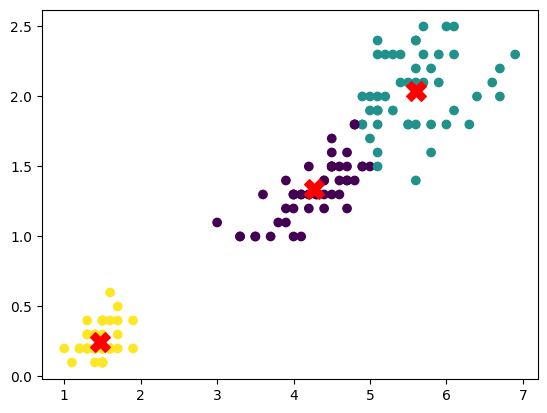

In [61]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=model.assign_labels(x), cmap='viridis')
plt.scatter(model.centroids[:,0], model.centroids[:,1], marker='X', s=200, c='red')
plt.show()